# Navigation

This notebook contains the solution to the navigation problem in the udacity deep reinforcement learning program. 

# 1. Importing dependencies and starting the environment

We will start by importing the required dependencies for this project, this project contains two python classes, one for the model and one of the RL agent

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque

from plot import Plot, PlotSingle
import sys
print(sys.version)

3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 11:27:44) [MSC v.1900 64 bit (AMD64)]


Next we will load the unity environment and get the default brain

In [2]:
def reset_env():
    env = UnityEnvironment(file_name="./Banana_Windows_x86_64/Banana.app")
    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]
    env_info = env.reset(train_mode=True)[brain_name]
    state_size = len(env_info.vector_observations[0])
    num_actions = brain.vector_action_space_size
    return env, env_info, state_size, num_actions, brain_name

env, env_info, state_size, num_actions, brain_name = reset_env()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 


In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
print('Number of actions:', num_actions)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [0.         1.         0.         0.         0.16895212 0.
 1.         0.         0.         0.20073597 1.         0.
 0.         0.         0.12865657 0.         1.         0.
 0.         0.14938059 1.         0.         0.         0.
 0.58185619 0.         1.         0.         0.         0.16089135
 0.         1.         0.         0.         0.31775284 0.
 0.        ]
States have length: 37


### 3. Create the train dqn agent 

In [7]:
import torch
def dqn(agent, agent_type, env, brain_name, num_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    
    eps=eps_start
    score = 0
    score_window = deque(maxlen=100)
    scores = []
    
    for i_episode in range(1, num_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps).astype(int)
            
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0] 
            
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
                
        score_window.append(score)
        scores.append(score)
            
        eps = max(eps_end, eps_decay*eps)
            
        #print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(score_window)), end="")
            
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(score_window)))
        
        if np.mean(score_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(score_window)))
            torch.save(agent.qnet_local.state_dict(), agent_type)
            break
        torch.save(agent.qnet_local.state_dict(), './saved_models/' + agent_type)
    
    return scores

In [ ]:
from agent import Agent

vanilla_dqn = Agent(state_size,  num_actions, use_double_q=False, use_dueling_net=False)

# Train the agent
print("Training Vanilla DQN")
env.reset(train_mode=True)[brain_name]
scores = dqn(vanilla_dqn,"Vanilla",  env, brain_name)

plt = PlotSingle(scores, "Vanilla DQN")
plt.make_plot()


THE DEVICE IS
cuda:0
QNet(
  (h1): Linear(in_features=37, out_features=20, bias=True)
  (h2): Linear(in_features=20, out_features=15, bias=True)
  (out): Linear(in_features=15, out_features=4, bias=True)
)
Training Double DQN
Episode 100	Average Score: 0.05
Episode 200	Average Score: 1.07
Episode 300	Average Score: 2.96
Episode 400	Average Score: 5.18
Episode 500	Average Score: 5.62
Episode 600	Average Score: 7.12
Episode 700	Average Score: 6.51
Episode 800	Average Score: 6.99
Episode 900	Average Score: 8.21
Episode 1000	Average Score: 7.52
Episode 1100	Average Score: 5.54
Episode 1200	Average Score: 8.08
Episode 1300	Average Score: 7.40
Episode 1400	Average Score: 7.58
Episode 1500	Average Score: 6.98
Episode 1600	Average Score: 6.95
Episode 1700	Average Score: 6.31
Episode 1800	Average Score: 8.39
Episode 1900	Average Score: 8.86
Episode 2000	Average Score: 8.36


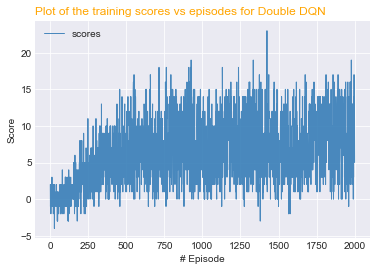

In [5]:
from agent import Agent

Double_DQN = Agent(state_size,  num_actions, use_double_q=True, use_dueling_net=False)

# Train the agent
print("Training Double DQN")
env.reset(train_mode=True)[brain_name]
scores = dqn(Double_DQN,"Double_DQN",  env, brain_name)

plt = PlotSingle(scores, "Double DQN")
plt.make_plot()


In [ ]:
from agent import Agent

Dueling_DQN = Agent(state_size,  num_actions, use_double_q=False, use_dueling_net=True)

# Train the agent
print("Training Dueling DQN")
env.reset(train_mode=True)[brain_name]
scores = dqn(Dueling_DQN,"Dueling_DQN",  env, brain_name)

plt = PlotSingle(scores, "Dueling DQN")
plt.make_plot()


THE DEVICE IS
cuda:0
Dueling_DQN(
  (h1): Linear(in_features=37, out_features=10, bias=True)
  (h2): Linear(in_features=10, out_features=10, bias=True)
  (adv): Linear(in_features=10, out_features=10, bias=True)
  (val): Linear(in_features=10, out_features=10, bias=True)
  (adv2): Linear(in_features=10, out_features=4, bias=True)
  (val2): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)
Training Dueling DQN
Episode 100	Average Score: -0.11
Episode 200	Average Score: 0.20
Episode 300	Average Score: 2.96
Episode 400	Average Score: 4.92
Episode 500	Average Score: 5.89
Episode 600	Average Score: 7.62
Episode 700	Average Score: 7.72
Episode 800	Average Score: 7.98
Episode 900	Average Score: 7.54
Episode 1000	Average Score: 7.62
Episode 1100	Average Score: 7.88
Episode 1200	Average Score: 8.56
Episode 1300	Average Score: 8.83
Episode 1400	Average Score: 8.56
Episode 1500	Average Score: 8.90
Episode 1600	Average Score: 8.16
Episode 1700	Average Score: 7.71
Episode 1800	Av

In [ ]:
from agent import Agent

Dueling_Double_DQN = Agent(state_size,  num_actions, use_double_q=True, use_dueling_net=True)

# Train the agent
print("Training Dueling Double DQN")
env.reset(train_mode=True)[brain_name]
scores = dqn(Dueling_Double_DQN,"Dueling_Double_DQN",  env, brain_name)

plt = PlotSingle(scores, "Dueling Double DQN")
plt.make_plot()
